# Bayesian Statistical Inference
### Data Analysis in Astronomy / Physics
#### António Cesário, 201706207
#### Master's in Experimental Physics, FCUP

In [11]:
library("ggplot2")
# library("cubature")

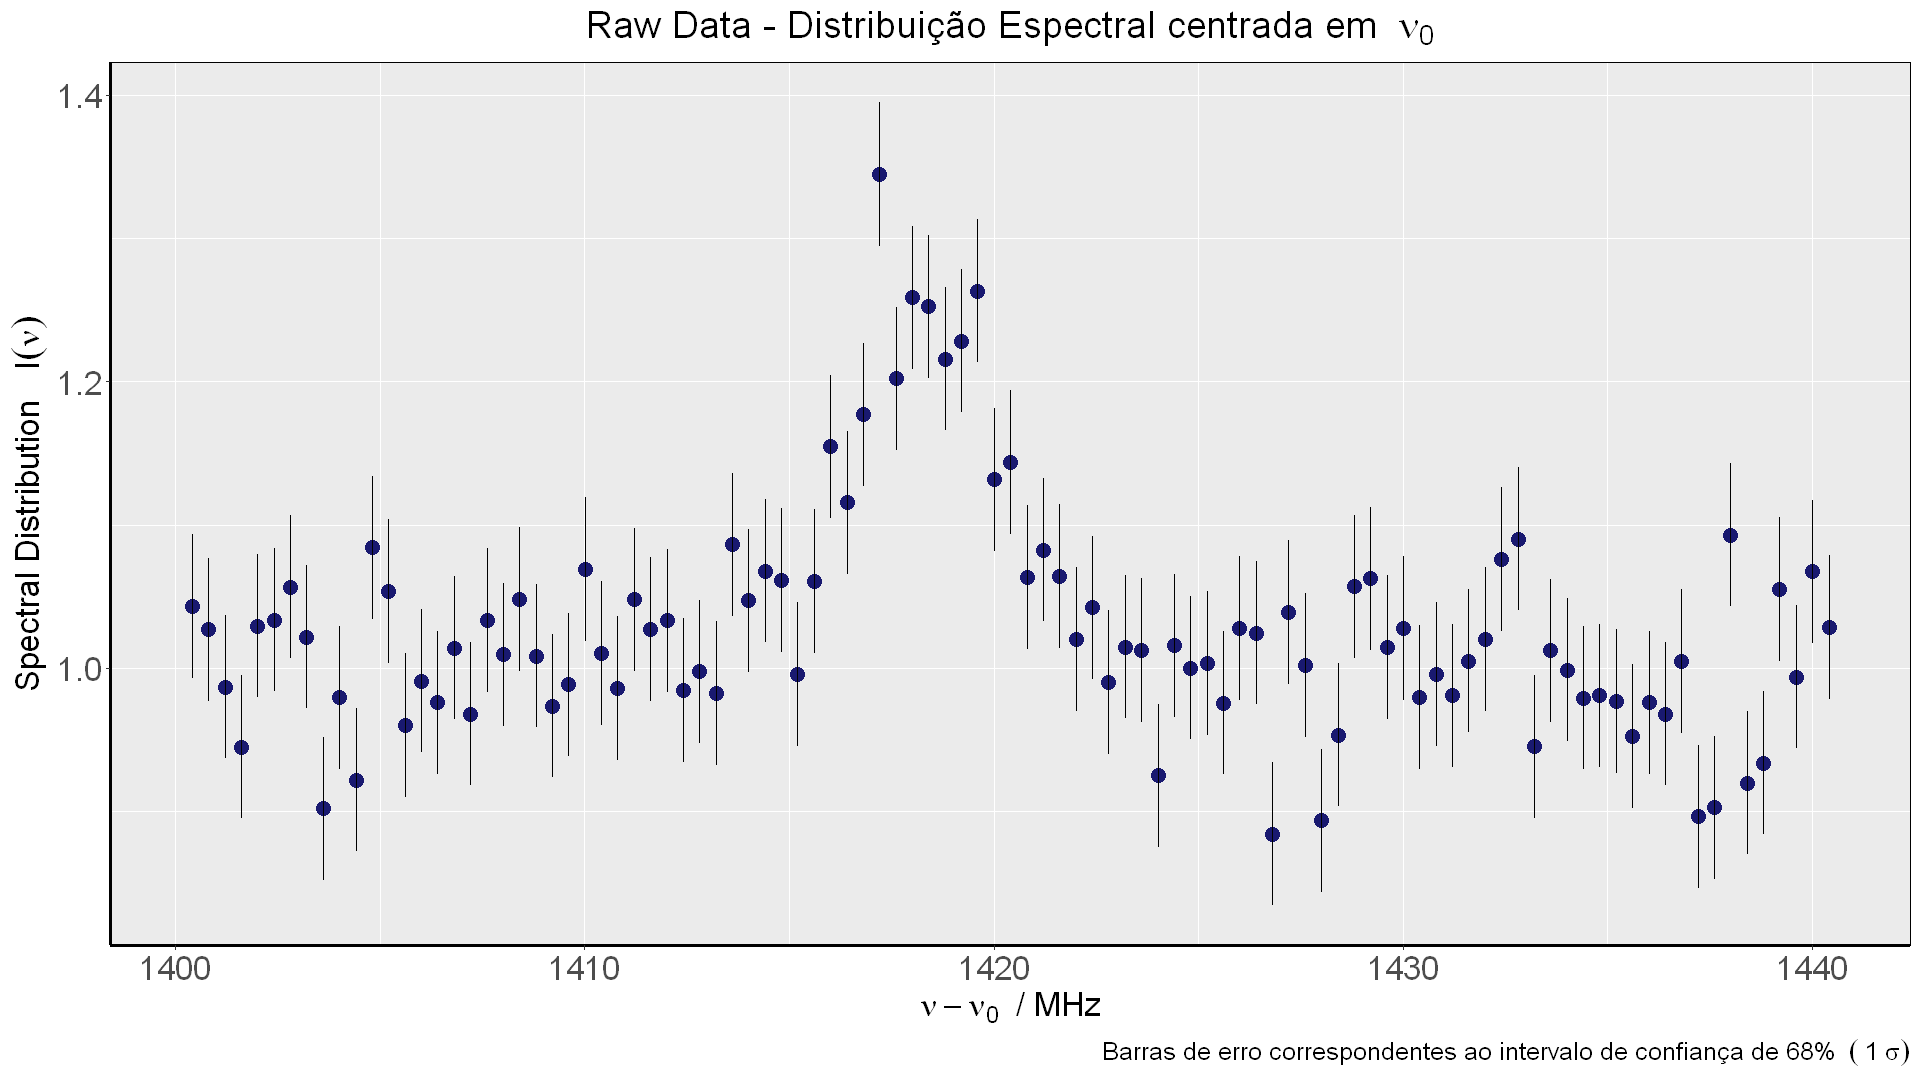

In [12]:
# Raw data visualization
options(repr.plot.width=16, repr.plot.height=9)
dados <- read.csv(file = 'data_Antonio.R',sep=' ', header=FALSE)
names(dados) = c('freq','intensity') # change data.frame header's names
# plot( dados,
#       main = expression(paste('Raw Data - Distribuição Espectral centrada em ',nu[0])),
#       xlab = expression(paste(nu-nu[0],' / MHz')),
#       ylab = expression(paste('Spectral Distribution\t',  I(nu) ))
#       )

# ggplot theme to ease visualization in jupyter notebook documents
jupyter.theme <- function(base_size = 13, base_family = "", base_line_size = base_size/22, 
                         base_rect_size = base_size/22) {         
  theme( 
    plot.title = element_text(size=23,hjust = 0.5),
    axis.title = element_text(size = 20),                               
    axis.text.x = element_text(size = 20),                              
    axis.text.y = element_text(size = 20),                              
    plot.caption = element_text(size = 15, face = "italic"),            
    #panel.background = element_rect(fill="white"),                      
    axis.line = element_line(size = 1, colour = "black"),
    strip.background = element_rect(fill = "#cddcdd"),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5),
        strip.text = element_text(colour = "black"),
        legend.key=element_blank()
  )
}

# actual plotting
ggplot( aes(x = freq, y = intensity), data = dados) +
    geom_point( size = 4 , colour = 'midnightblue' ) +
    xlab(bquote(nu-nu[0]~' / MHz')) +
    ylab(bquote('Spectral Distribution\t' ~ I(nu))) +
    labs(title = bquote('Raw Data - Distribuição Espectral centrada em '~nu[0]),
        caption = bquote('Barras de erro correspondentes ao intervalo de confiança de 68% '~(~'1'~sigma))) + 
    geom_linerange(aes(ymin = intensity -.05, ymax = intensity + .05)) + 
    jupyter.theme()

## A. Question A

Queremos avaliar a existência de uma risca espectral na gama de frequências analisada experimentalmente. Para isso, foi proposta uma teoria em que a emissão é caracterizada pela seguinte equação

$$
\begin{align}
G(\nu) &= 1 \pm \frac{1}{g} \sqrt{\frac{\ln 2}{\pi}} \operatorname{exp}\left\{-\dfrac{\log 2\left(\nu-\nu_{0}\right)^{2}}{g^{2}}\right\}\\
+ &\equiv \textrm{a risca é de emissão}\\
- &\equiv \textrm{a risca é de absorção}
\end{align}
$$
onde $\nu_0$ (posição central do pico) e $g$ (1/2 da **FWHM**) são parâmetros livres da teoria. Propõem-se, portanto, os modelos 

$$
\begin{align}
G^0 &\equiv \textrm{distribuição uniforme na gama de frequências apresentada.}\\
G^+ &\equiv \textrm{emissão espectral caracterizada por $\nu_0$ e $g$.}
\end{align}
$$

Para testar qual destes modelos descreve melhor os dados obtidos, irei recorrer a uma análise Bayesiana dos mesmos, onde primeiro irei determinar o *Odds Ratio* destes dois modelos, para saber qual é que descreve melhor os dados, e depois a probabilidade de, tendo em conta os dados fornecidos, existir uma risca de emissão espectral com um prefil gaussiano de $g = 2$. Esta probabilidade pode-se escrever da forma

$$
p\left(g \mid G^{+}, D, I\right) \equiv \textrm{probabilidade pedida}
$$

sendo esta a probabilidade a que é pedida para esta alínea. Considerando a regra do produto de probabilidades, podemos reescrevê-la na forma

$$
p\left(g \mid G^{+}, D, I\right) = \dfrac{p\left(g \mid G^+ , I\right)}{p\left(D \mid G^{+} ,I\right)} p\left( D \mid g , G^+, I\right)
$$

A nossa análise passará, então, por determinar cada um dos termos à direita da equação anterior.

### A.1 Cálculo de $\mathcal{O}_{0}^{+}$

O *Odds Ratio* entre os modelos $G^+$ e $G^0$ é dado por

$$
\begin{aligned}
\mathcal{O}_{0}^{+} &= \dfrac{p\left(G^{+} \mid D, I\right)}{p\left(G^{0} \mid D, I\right)} \\
&=\dfrac{p\left(G^{+} \mid I\right)}{p\left(G^{0} \mid I\right)} \cdot \dfrac{p\left(D \mid G^{+}, I\right)}{p\left(D \mid G^0, I\right)}
\end{aligned}
$$

onde identificamos os termos

$$
\begin{aligned}
\dfrac{p\left(G^{+} \mid I\right)}{p\left(G^{0} \mid \mathrm{I}\right)} &\equiv \textrm{razão entre priors}\\
\dfrac{p\left(D \mid G^{+}, I\right)}{p\left(D \mid G^0, I\right)} &\equiv \textrm{fator de Bayes}
\end{aligned}
$$

assumindo ignorância total sobre qual dos modelos caracteriza melhor os dados,

$$
\dfrac{p\left(G^{+} \mid I\right)}{p\left(G^{0} \mid I\right)} = 1
$$

logo

$$
\mathcal{O}_{0}^{+} = \dfrac{p\left(D \mid G^{+}, I\right)}{p\left(D \mid G^0, I\right)} \quad \textrm{(fator de Bayes)}
$$

Se $\mathcal{O}_{0}^{+} >> 1$ o modelo $G^+$ descreve os dados com maior verossimelhança. O oposto caso $\mathcal{O}_{0}^{+} << 1$. O método para calcular os termos acima será apresentado mais adiante, na discussão da determinação da probabilidade pedida.

### A.2 Cálculo de $p\left( D \mid g , G^+, I\right)$ ( *Likelihood* do modelo $G^+ \mid g$)

Admitindo que os resultados de cada medição são **independentes**, a probabilidade de obter os dados da experiência assumindo o modelo $G^+$ com parâmetros $g = g$ e $\nu_0 = \nu_0$ é dada por

$$
\begin{align}
p\left(D \mid G^{+}, g, \nu_{0}, I\right) &= \prod_{i=1}^{N} p\left(D_{i} \mid G^{+}, g, \nu_{0}, I\right)\\
    &= \prod_{i=1}^{N} p\left(E_{i} \mid G^{+}, g, \nu_{0}, I\right)
\end{align}
$$

$$
\begin{align}
p\left(D_{i} \mid G^{+}, g, \nu_{0}, I\right) &\equiv \textrm{probabilidade de obter o valor $d_i$ na medição $i$ de acordo com o modelo $G^{+}$ }\\
p\left(E_{i} \mid G^{+}, g, \nu_{0}, I\right) &\equiv \textrm{probabilidade de obter um erro de $e_i$ na medição $i$ de acordo com o modelo $G^{+}$ }
\end{align}
$$

O valor medido no bin $i$, $d_i$, é, à luz do modelo $G^+$, dado por

$$
\begin{align}
d_i &= f_i + e_i\\
f_i &= 1 + \frac{1}{g} \sqrt{\frac{\log 2}{\pi}} \operatorname{exp}\left\{-\dfrac{\log 2\left(\nu-\nu_{0}\right)^{2}}{g^{2}}\right\}
\end{align}
$$

onde $f_i$ é o valor previst0 pelo modelo e $e_i$ o erro da medição. É-nos dito que o erro tem forma Gaussiana com um desvio padrão de $\sigma = 0.05 \textrm{ MHz}$ logo podemos escrever

$$
\begin{align}
p\left(E_{i} \mid G^{+}, g, \nu_{0}, I\right) &= \frac{1}{\sigma \sqrt{2 \pi}} \operatorname{exp}\left\{-\dfrac{e_{i}^{2}}{2 \sigma^{2}}\right\}\\
&= \dfrac{1}{\sigma \sqrt{2 \pi}} \operatorname{exp}\left\{-\dfrac{\left(d_i-f_i\right)^{2}}{2 \sigma^{2}}\right\}
\end{align}
$$

concluimos, portanto, que

$$
p\left(D \mid G^{+}, g,\nu_0, I\right)=\frac{1}{\sigma^{N}(2 \pi)^{N / 2}} \exp\left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_{i}-f_{i}\right)^{2}\right\}
$$

onde, mais uma vez, $d_i$ é o valor obtido no bin $i$ e $f_i$ o valor previsto pelo modelo $G^+$ para esse mesmo bin.

Estamos apenas interessados num dos parâmetros livres, a largura espectral $g$, pelo que temos que marginalizar as distribuições relativamente ao parâmetro $\nu_0$.

#### A.2.1 Cálculo de $p\left( D \mid G^0, I\right)$ - (*Likelihood* do modelo $G^0$)

O modelo $G^0$ assume que o espectro obtido experimentalmente é consistente com o ruído esperado e não tem parâmetros livres. Assim, usando a mesma argumentação que na derivação da *Likelihood* anterior,

$$
d_i = 1 + e_i
$$

e portanto

$$
p\left(D \mid G^{0}, I\right)=\frac{1}{\sigma^{N}(2 \pi)^{N / 2}} \exp\left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_{i}-1\right)^{2}\right\}
$$

#### A.2.2 Marginalização em $\nu_0$

A *Likelihood* que queremos determinar nesta secção é dada por

$$
p\left(D \mid g , G^{+}, I\right)
    = \int \operatorname{d\nu_0} p \left(\nu_0 \mid g, G^{+}, I \right) p\left(D \mid g,\nu_0,G^{+}, I\right)\\
$$

#### A.2.3 Escolher $p \left(\nu_0 \mid g, G^{+}, I \right)$ - ( *prior* de $\nu_0$)

Para escolher a ***prior*** de $\nu_0$, $p \left(\nu_0 \mid g, G^{+}, I \right)$, primeiro reconhecemos que este termo se trata de um **parâmetro de localização** da distribuição, pelo que será aconselhado escolher

$$
p \left(\nu_0 \mid g, G^{+}, I \right) = \dfrac{1}{\Delta\nu}
$$

para impôr a condição da invariância de translação neste parâmetro. Como só nos é fornecida informação relativamente à gama de frequências estudada experimentalmente, irei assumir que o pico de emissão se encontra centrada nesta mesma gama de frequências, ou seja,

$$
\begin{align}
\Delta \nu 
    &= \nu_{\textrm{Máximo medido}} - \nu_{\textrm{mínimo medido}}\\
    &= 1440.4 - 1400.4\\
    &= 40 \textrm{ MHz}
\end{align}
$$

Para além da invariância de translação, outra razão que me levou a escolher uma *prior* uniforme para este parâmetro, em vez de uma de Jeffreys, está relacionada com o facto de $\Delta\nu$ não se estender por várias ordens de grandeza, pelo contrário,

$$
\dfrac{\Delta\nu}{\nu_{min}} \approx 3 \%
$$

o que significa que o acréscimo de probabilidade para maiores valores de $\nu_0$ devido à *prior* uniforme será pequeno.
Com isto concluimos que 

$$
p\left(D \mid g , G^{+}, I\right)
    = \int \dfrac{\operatorname{d\nu_0}}{\Delta\nu} \frac{1}{\sigma^{N}(2 \pi)^{N / 2}} \exp\left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_{i}-f_{i}\right)^{2}\right\}
$$

### A.3 Escolher $p\left(g\mid G^+,I\right)$ - (*prior* em $g$)

Devemos de ter em consideração que $g$ é um **parâmetro de escala** da distribuição pelo que, para impôr invariância de escala relativamente a esta grandeza, devemos de usar uma ***prior* de Jeffreys** tal que

$$
p\left(g\mid G^+,I\right) = \dfrac{1}{g \log\left(\dfrac{g_{max}}{g_{min}}\right)}
$$

Para impôr os limites possíveis para $g$, aponto para a o facto de

$$
G_{\textrm{max}}^{+}(\nu) - 1 \propto \dfrac{1}{g}
$$

onde $G_{\textrm{max}}^{+}$ é o máximo do espectro de emissão segundo o modelo $G^+$, ou seja,

$$
\begin{align}
g >> 1& \quad\textrm{ a emissão é penalizada em amplitude e a risca é muito larga;}\\
g << 1& \quad\textrm{ a emissão tem grande amplitude mas com a risca muito localizada;}
\end{align}
$$

Ao observar o gráfico com os dados representados, se considerarmos que o máximo medido ronda os $G_{max} \approx 1.4$, então, como $G_{max} = 1 + 1/g \cdot\sqrt{\log 2/\pi}$ obtemos uma estimativa para a ordem de grandeza de $g \approx 1$. Tendo isto em conta, considero que uma estimativa conservadora para o intervalo em que $g$ está contido será 

$$
g \in \left[10^{-2},10^{2}\right]
$$

e portanto

$$
p\left(g\mid G^+,I\right) = \dfrac{1}{4\log\left(10\right)\cdot g}
$$

### A.4 Determinar $p\left(D\mid G^+,I\right)$ - (*Likelihood* do modelo $G^+$)

Finalmente, para determinar a *Likelihood* global associada ao modelo $G^+$, temos que marginalizar $p\left(D\mid g, G^+,I\right)$ no parâmetro $g$, ou seja,

$$
\begin{align}
p\left(D \mid G^{+}, I\right)
    &= \int \operatorname{dg} p \left(g \mid G^{+}, I \right) p\left(D \mid g,G^{+}, I\right)\\
    &= \int \dfrac{\operatorname{dg}}{4\log\left(10\right)\cdot g}\left[
    \int \dfrac{\operatorname{d\nu_0}}{\Delta\nu} \frac{1}{\sigma^{N}(2 \pi)^{N / 2}} \exp\left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_{i}-f_{i}\right)^{2}\right\}
    \right]
\end{align}
$$

Com isto, estão estabelecidas as equações principais necessárias para realizar a análise de dados desta questão. A discussão que se segue irá centrar-se mais no código e nos algoritmos utilizados para a concretização da análise.

In [10]:
sqrt(log(2)/pi)/.4

[1] 1.174297

In [51]:
# arr.Nus <- dados[1] # array of \nu's, we'll set them to be exactly the values of \nu of the experiment
# g <- 2.

# Integrand <- numeric(0)
# for ( i in 1:nrow(arr.Nus)){
#   Integrand[i] <- integrand(arr.Nus$freq[i], g)
# }
# ----------------------------------------------------------------

$$
P\left(D \mid G_{0}, I\right)=\dfrac{1}{(2 \pi)^{N / 2} \sigma^{N}} \operatorname{exp}\left\{-\dfrac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_i-1\right)^{2}\right\}
$$

$$
\begin{align}
P\left(D \mid G^{+}, I\right)
    &= \int \operatorname{dg} p \left(g \mid G^{+}, I \right) p\left(D \mid G^{+} ,g, I\right)\\
    &=\int \dfrac{d g}{4 \log (10) \cdot g} \dfrac{d \nu_{0}}{\Delta \nu} \dfrac{1}{(2 \pi)^{N / 2} \sigma^{N}} \operatorname{exp}\left\{-\dfrac{1}{2 \sigma^{2}} \sum_{i=1}^{N}\left(d_i-f_i\right)^{2}\right\}
\end{align}
$$

.

$$
f_i = 1+\dfrac{1}{g}\sqrt{\frac{\log 2}{\pi}} \operatorname{exp}\left\{ -\log\left(2\right)\dfrac{\left(\nu_{i}-\nu_{0}\right)^{2}}{g^{2}} \right\}
$$

In [108]:
# Defining Constants trhoughout the question
Nu.data <- dados[1]
G.data <- dados[2]

sigma <- 0.05
N <- 101

nu.min <- Nu.data$freq[1] # minimum value of \nu in data
nu.max <- tail(Nu.data$freq,n=1) # maximum of \nu in data
nu.step <- Nu.data$freq[2] - Nu.data$freq[1] # step between consecutive \nu's in data
Delta.nu <- nu.max - nu.min # range of frequencies in data

g.max <- 1e+2
g.min <- 1e-2


# Likelihood - G0 hypothesis - Final Calculation
Likelihood_G.null <- function(){
    summation <- sum( (G.data - 1.)^2. ) * (- 0.5 / sigma^2. )
    
    exp(summation) / ( sqrt(2.*pi) * sigma ) ^ N
}


# Likelihood - G+ hypothesis - Final Calculation
Likelihood_G.plus <- function(){
    integrate( Vectorize(integrand_g ,vectorize.args = 'g.prime'),
              lower = g.min,
              upper = g.max
             )
}


# Likelihood - G+ hypothesis - Integrand
integrand_g <- function(g.prime){
    integral_1 <- integrate(Vectorize(integrand_nu0_g,vectorize.args = 'nu_0'),
                            lower = nu.min,
                            upper = nu.max,
                            g = g.prime
                            )
    
    Integrand_g <- integral_1$value / ( g.prime * log(g.max/g.min) )
    # error1 <- integral_1$abs.error
    
    Integrand_g
}


# Likelihood - G+ hypothesis - \nu_0 integrand
integrand_nu0_g <- function( nu_0 , g = 2.0 ){
    fi <- emission_spec( Nu.data , nu_0 , g )
    summation  <- sum( (G.data - fi)^2. ) * (- 0.5 / sigma^2.0 )
    
    exp(summation) / Delta.nu / ( sqrt(2.*pi) * sigma ) ^ N
}


# Theoretical Emission Curve - G+ hypothesis 
emission_spec <- function(nu_i, nu_0, g) {
    # nu_i : frequecies in data
    # nu_0 : free parameter, postion of the emission spectrum
    # g : free parameter, scale of the emission spectrum
    f1 <- exp( - log(2) * (nu_i-nu_0)^2 / g^2 )
    1. + f1 * sqrt(log(2)/pi) / g
}

In [109]:
integrate(Vectorize(function(g) {
    
    integrate(Vectorize(function(nu_0) {
        
        exp(sum((G.data - 1. + exp(-log(2) * (Nu.data-nu_0)^2 / g^2 ) * sqrt(log(2)/pi) / g )^2. ) * (- 0.5 / sigma^2.0 )) / g #exp(summation) / ...
        # ( Delta.nu * ( g * log(g.max/g.min) ) * ( sqrt(2.*pi) * sigma ) ^ N )
        
    } , vectorize.args = 'nu_0') , upper = nu.max, lower = nu.min )$value 
    
    } , vectorize.args = 'g' ) , upper = g.max , lower = g.min )

5.607223e-72 with absolute error < 2.4e-75

In [81]:
Likelihood_G.plus()

ERROR: Error in integrate(Vectorize(integrand_nu0_g, vectorize.args = "nu_0"), : maximum number of subdivisions reached


In [69]:
# Rcpp::cppFunction('double mylast(NumericVector x) { int n = x.size(); return x[n-1]; }')
# options(width=100)
# for (n in c(1e3,1e4)) {
#   x <- runif(n);
#   print(microbenchmark::microbenchmark(x[length(x)],
#                                        mylast(x),
#                                        tail(x, n=1),
#                                        dplyr::last(x),
#                                        x[end(x)[1]],
#                                        rev(x)[1]))}

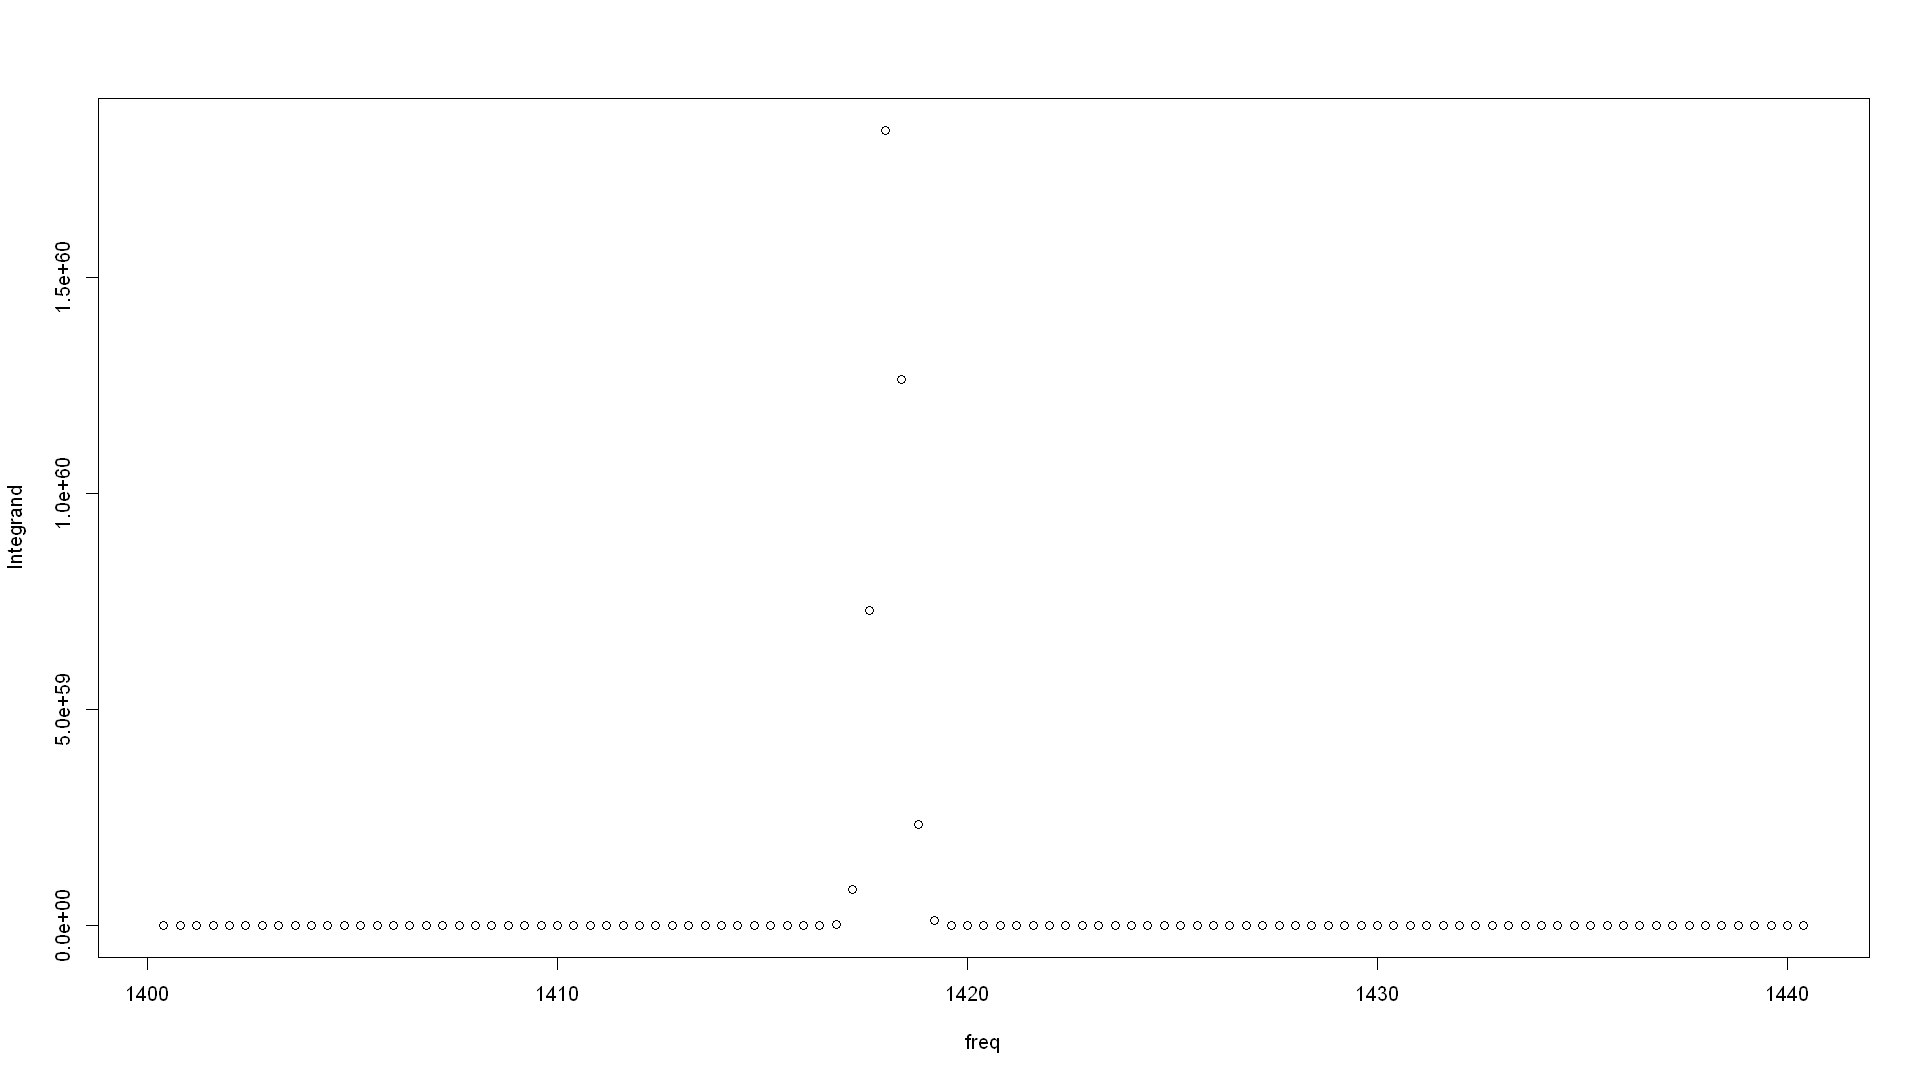

In [70]:
Integrand <- numeric(0)
for ( i in 1:nrow(arr.Nus)){
  Integrand[i] <- integrand_nu0.marginalization(arr.Nus$freq[i], g = 4)
}
plot(data.frame(arr.Nus,Integrand))

In [107]:
5.9e-70/ ( sqrt(2.*pi) * sigma ) ^ N 

[1] 7.358651e+21

In [106]:
Likelihood_G.null()

[1] 5.774723e+23